In [11]:
import pandas as pd
import matplotlib.pyplot as plt

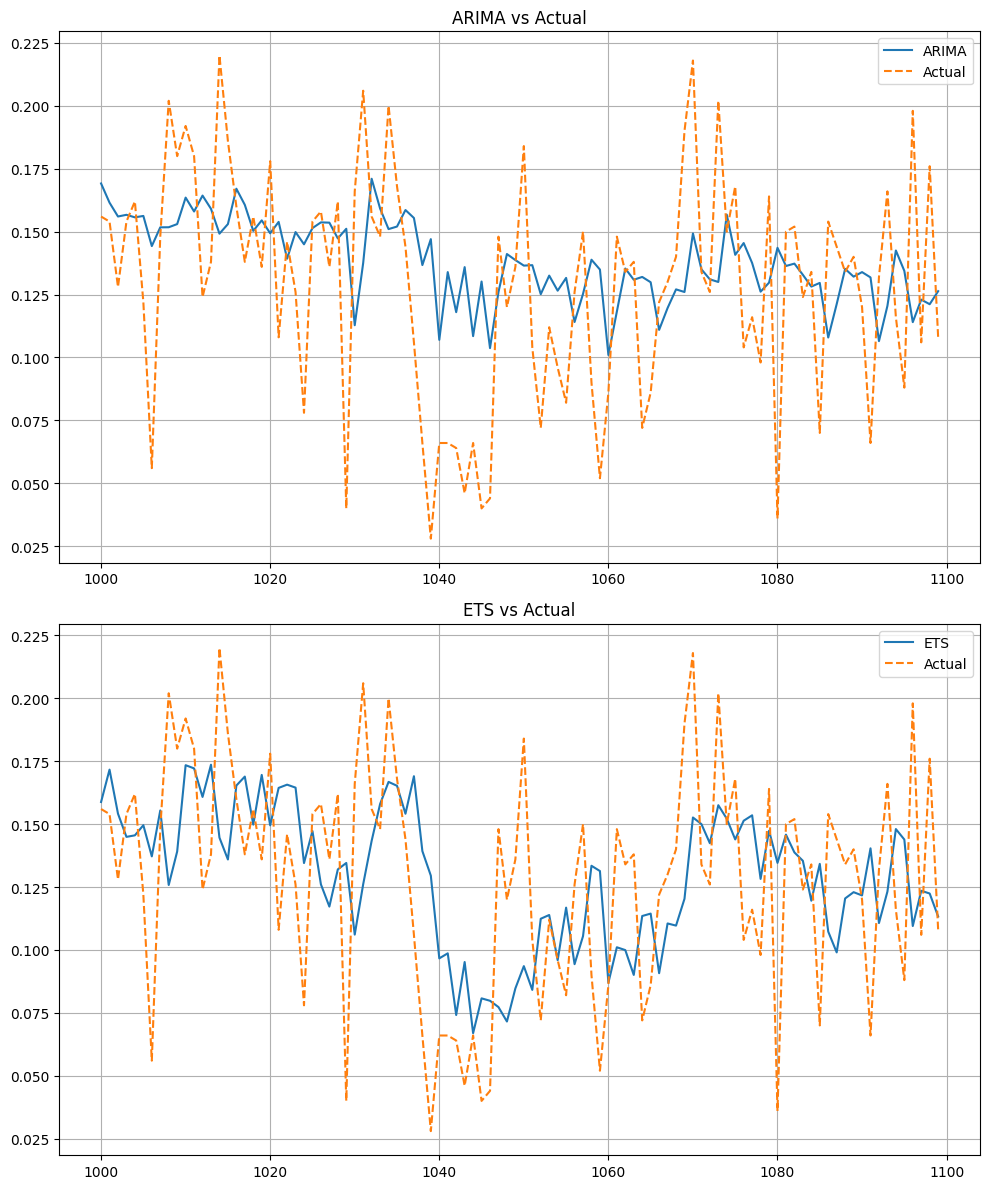

In [12]:
# Import the data
df = pd.read_csv('meta.csv')

# Plot the data
fig, axes = plt.subplots(nrows=len(df.columns) - 2, figsize=(10, 6 * (len(df.columns) - 2)))

ax_idx = 0  # Separate index for accessing axes

for column in df.columns:
    if column != 'Index' and column != 'Actual':
        axes[ax_idx].plot(df['Index'], df[column], label=column)
        axes[ax_idx].plot(df['Index'], df['Actual'], label='Actual', linestyle='--')
        axes[ax_idx].legend()
        axes[ax_idx].grid(True)
        axes[ax_idx].set_title(f'{column} vs Actual')
        ax_idx += 1  # Increment ax_idx

plt.tight_layout()
plt.show()